In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate


In [170]:
df = pd.read_csv("AMES_Final_DF.csv")
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

<h5> Summary so far </h5>

For linear regression (with no polynomial features), our most accurate prediction came with Lasso regularisation with lambda = 120. The root mean squared error was 11.37% of the mean sales price. <br><br>

Now we will try a polynomial fit

<h5> Search for optimal polynomial degree </h5>

<h5> Outline </h5>

For the sake of expediency, we will plot the errors for different polynomial degrees using Ridge regularisation with a fixed regularisation parameter. <br>
Also, we will use a relatively small training set (around 500 samples)



However, before starting with polynomial regression, we will try to reduce the number of features.

<h3> Reducing the Number of Features </h3>

Create a correlation matrix. Then select only the features that correlate with the 'SalePrice' value by 0.3 or above.

In [171]:
corrM = df.corr()

In [172]:
abs(corrM['SalePrice'])>0.3

Lot Frontage               True
Lot Area                  False
Overall Qual               True
Overall Cond              False
Year Built                 True
                          ...  
Sale Condition_AdjLand    False
Sale Condition_Alloca     False
Sale Condition_Family     False
Sale Condition_Normal     False
Sale Condition_Partial     True
Name: SalePrice, Length: 274, dtype: bool

In [173]:
ser = abs(corrM['SalePrice'])>0.3

In [174]:
# Get just true column labels
ser[ser].index

Index(['Lot Frontage', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'SalePrice', 'MS SubClass_60', 'Lot Shape_Reg', 'Neighborhood_NridgHt',
       'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd', 'Mas Vnr Type_None',
       'Mas Vnr Type_Stone', 'Exter Qual_Gd', 'Exter Qual_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'Bsmt Qual_TA',
       'Bsmt Exposure_Gd', 'BsmtFin Type 1_GLQ', 'Heating QC_TA',
       'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Fireplace Qu_Gd',
       'Fireplace Qu_None', 'Garage Type_Attchd', 'Garage Type_Detchd',
       'Garage Finish_Unf', 'Sale Type_New', 'Sale Condition_Partial'],
      dtype='object')

In [175]:
# Create subset of dataframe including only the selected features
df_subset = df.loc[:, ser]

In [176]:
df_subset.shape

(2925, 41)

Now we only have 41 features instead of 274 features. This will speed up the computation considerably when we work with polynomial features.

<h3> Predict and Evaluate for multiple Polynomial Degrees (d) using for loop </h3>

In [91]:
"""

degrees = [2, 3, 4, 5, 6]
errors = []
error_percentages = []

for d in degrees: 

    X = df_subset.drop('SalePrice', axis = 1)
    y = df_subset['SalePrice']
    polynomial_converter = PolynomialFeatures(degree=d)
    poly_features = polynomial_converter.fit_transform(X)

    # Select smaller training and cv sets.

    X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.75, random_state=101)
    X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)



    # We will be working with X_train to train the model, and X_cv to compute the error
    # Scale X values
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_cv = scaler.transform(X_cv)
    len (scaled_X_train), len (y_train)
    model = Ridge(alpha = 100)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_cv)
    MSE = mean_squared_error (y_pred, y_cv)
    RMSE = np.sqrt(MSE)
    error_pct = 100*RMSE / df_subset['SalePrice'].mean()

    errors.append(RMSE)
    error_percentages.append(error_pct)

"""



"\n\ndegrees = [2, 3, 4, 5, 6]\nerrors = []\nerror_percentages = []\n\nfor d in degrees: \n\n    X = df_subset.drop('SalePrice', axis = 1)\n    y = df_subset['SalePrice']\n    polynomial_converter = PolynomialFeatures(degree=d)\n    poly_features = polynomial_converter.fit_transform(X)\n\n    # Select smaller training and cv sets.\n\n    X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.75, random_state=101)\n    X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)\n\n\n\n    # We will be working with X_train to train the model, and X_cv to compute the error\n    # Scale X values\n    scaler = StandardScaler()\n    scaler.fit(X_train)\n    scaled_X_train = scaler.transform(X_train)\n    scaled_X_cv = scaler.transform(X_cv)\n    len (scaled_X_train), len (y_train)\n    model = Ridge(alpha = 100)\n    model.fit(scaled_X_train, y_train)\n    y_pred = model.predict(scaled_X_cv)\n    MSE = mean_squared_error 

I'm getting the following error message: <br>
"UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead" <br><br>

This means I have more polyfeatures than training samples, which is not good. <br>
I'll try to reduce the number of features even further. <br><br>

Note, the number of terms when you have n features and poly degree of d: <br>
(n+d)! / d!(d-n)!


In [177]:
corrM = df.corr()
abs(corrM['SalePrice'])>0.4
ser = abs(corrM['SalePrice'])>0.4
# Get just true column labels
ser[ser].index
# Create subset of dataframe including only the selected features
df_subset = df.loc[:, ser]
df_subset.shape

(2925, 23)

Correlation of 0.4 or above reduces number of features to 23. <br>
Correlation of 0.5 or above reduces number of features to 15. <br>
Correlation of 0.6 or above reduces features to 7. <br><br>

Try with 23 first.

In [178]:
degrees = [1, 2, 3, 4, 5, 6]
errors = []
error_percentages = []

for d in degrees: 

    X = df_subset.drop('SalePrice', axis = 1)
    y = df_subset['SalePrice']
    polynomial_converter = PolynomialFeatures(degree=d)
    poly_features = polynomial_converter.fit_transform(X)

    # Select smaller training and cv sets.

    X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.75, random_state=101)       # X_train = 25% of data
    X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)           # X_cv = 7.5% of data



    # We will be working with X_train to train the model, and X_cv to compute the error
    
    # Scale X values
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_cv = scaler.transform(X_cv)
    
    model = Ridge(alpha = 100)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_cv)
    MSE = mean_squared_error (y_pred, y_cv)
    RMSE = np.sqrt(MSE)
    error_pct = 100*RMSE / df_subset['SalePrice'].mean()

    errors.append(RMSE)
    error_percentages.append(error_pct)

In [94]:
# Run time = 43 seconds for correlation of 0.4 or higher

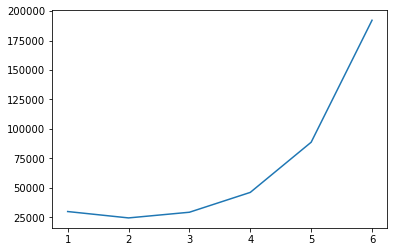

In [179]:
plt.plot(errors)
plt.xticks(ticks = range(len(degrees)), labels = degrees)
plt.show()

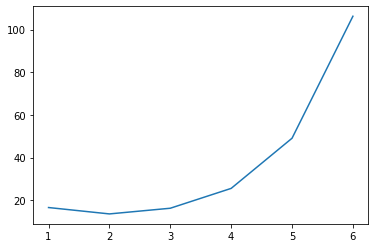

In [180]:
plt.plot(error_percentages)
plt.xticks(ticks = range(len(degrees)), labels = degrees)
plt.show()

In [181]:
# Second degree polynomial actually looks the best.

In [182]:
error_percentages

[16.60843187027039,
 13.61644626796085,
 16.280086701867084,
 25.58361941512367,
 49.09851745517785,
 106.28706133819792]

We have determined that polynomial degree = 1, 2, 3 are three of the best candidates. <br>
We've already trained and evaluated the best model for degree = 1. <br>
Now let's move on to degrees 2 and 3. <br>

Bear in mind that we've reduced the number of features to 23, using the correlation matrix. <br>
Picked the features that correlate with price by 0.4 or higher.

<h4> Polynomial degree = 2 </h4>

In [183]:
# Create variables 
X = df_subset.drop('SalePrice', axis = 1)
y = df_subset['SalePrice']

# Create polynomial features
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)

<h5> Ridge Regression </h5>

We begin by trying to find a rough range of the optimal lambda value.

In [184]:
# Select small training set and cv set

X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.8, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 585 ||||| CV set size: 234


In [185]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)

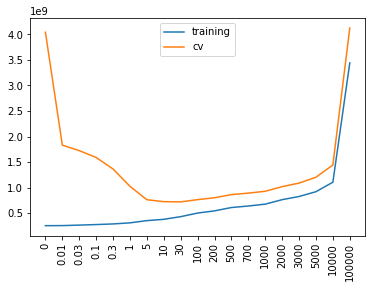

In [186]:
# Plot training error and cv error for a range of lambda values

alphas = [0, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100, 200, 500, 700, 1000, 2000, 3000, 5000, 10000,100000]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Optimal range seems to be between 0.5 and 500. Plot again with finer lambda density.

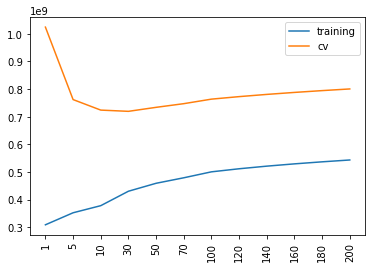

In [187]:
# Plot training error and cv error for a range of lambda values

alphas = [1, 5, 10, 30, 50, 70, 100, 120, 140, 160, 180, 200]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

The elbow actually seems to be in the region of 1 to 100. <br>
Let's use a bigger training set now (80%) and use cross_val_score.

In [188]:
# Split training / test set

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_test)}')

training set size: 2632 ||||| CV set size: 293


In [189]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [196]:
alphas = [10 + 2*i for i in range(150)]
cv_errors = []
for alpha in alphas:
    model = Ridge(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

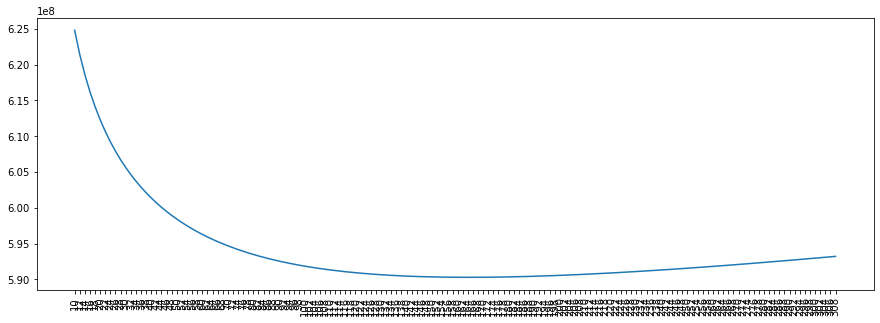

In [197]:
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

In [198]:
min_value = min(cv_errors)
min_index = cv_errors.index(min_value)

alphas[min_index], min_value

(164, 590295810.997483)

lambda = 164 is our optimal value

<h5> Create Model, Predict, Evaluate </h5>

In [195]:
# Create model
model = Ridge (alpha = 164)
model.fit(scaled_X_train, y_train)

# Predict
y_pred = model.predict(scaled_X_test)

# Evaluate
MSE = mean_squared_error(y_pred, y_test)
RMSE = np.sqrt(MSE)
round(100*RMSE / df['SalePrice'].mean(), 2)

12.87

Mean error of 12.87% <br>
This fares quite a lot worse than the linear case. <br>
Unsurprising, given that we selected only 23 features. <br>
Let's try Lasso regularisation now.


<h5> Lasso Regularisation </h5>

In [199]:
# Select small training set and cv set

X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.8, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 585 ||||| CV set size: 234


In [200]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60154615906.78511, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28950701159.3403, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2494878261.3616333, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(


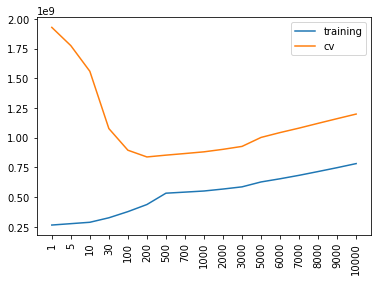

In [201]:
# Plot training error and cv error for a range of lambda values

alphas = [1, 5, 10, 30, 100, 200, 500, 700, 1000, 2000, 3000, 5000, 6000, 7000, 8000, 9000, 10000]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter= 20000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Optimal lambda value in the area of 30 to 700

In [202]:
# Plot training error and cv error for a range of lambda values

alphas = [30 + 30*i for i in range (30)]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter= 10000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916657983.8625488, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(


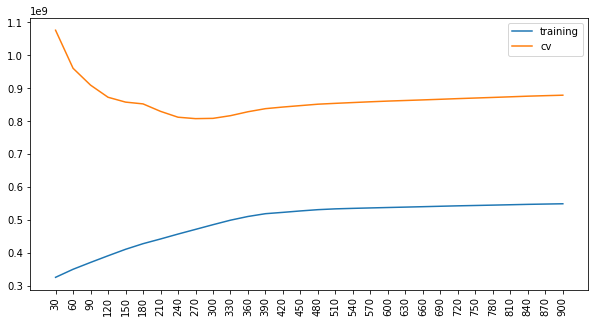

In [203]:
plt.figure(figsize = (10,5))
plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Optimal range is from 150 to 450 <br>
Now let's go back to full data set and use cross_val_score

In [213]:
# Split training / test

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_test)}')

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


training set size: 2632 ||||| CV set size: 293


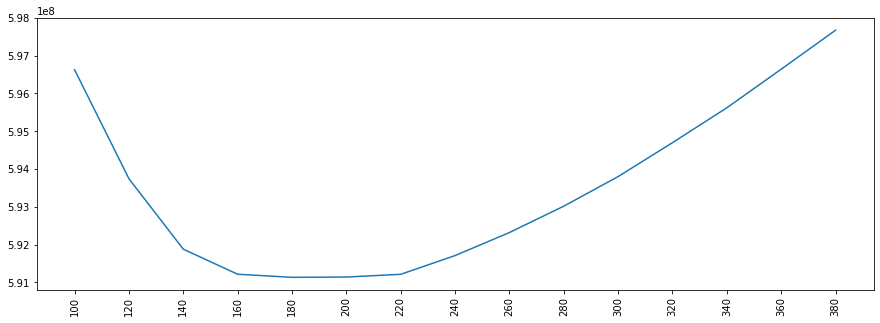

In [214]:
# Compute errors for range of lambda values
alphas = [100 + 20*i for i in range(15)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha, max_iter= 10000)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

Optimum range is 120 to 280

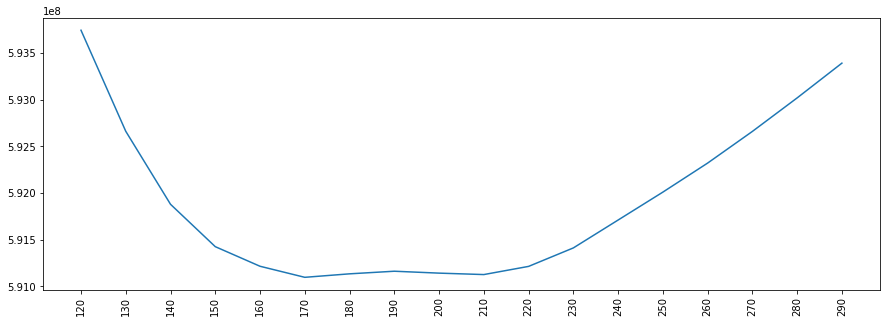

In [215]:
# Compute errors for range of lambda values
alphas = [120 + 10*i for i in range(18)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha, max_iter=10000)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

In [216]:
# Compute errors for range of lambda values
alphas = [140 + 5*i for i in range(25)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha, max_iter=10000)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)


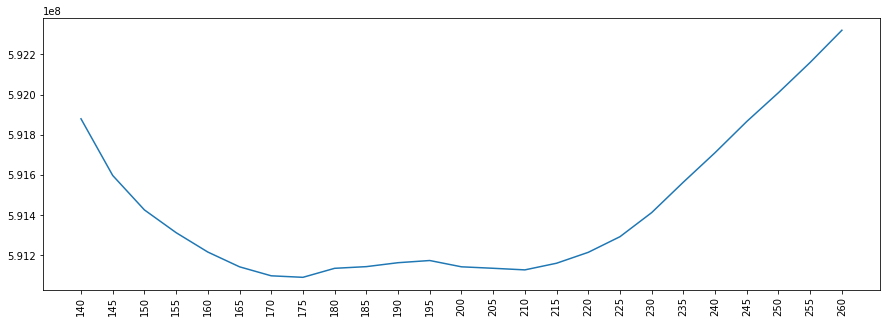

In [217]:

# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

In [218]:
# Find min value and corresponding alpha value
min_value = min(cv_errors)
min_index = cv_errors.index(min_value)

alphas[min_index], min_value

(175, 591090691.045523)

Lambda = 175 is the optimum

<h5> Create model, predict, evaluate </h5>

In [219]:
# Create model
model = Lasso (alpha = 175)
model.fit(scaled_X_train, y_train)

# Predict
y_pred = model.predict(scaled_X_test)

# Evaluate
MSE = mean_squared_error(y_pred, y_test)
RMSE = np.sqrt(MSE)
round (100*RMSE / df['SalePrice'].mean(), 2)

12.99

Mean error of 12.99 % <br>
As expected, the accuracy is similar to Ridge regression

Let's repeat the same procedure for polynomial degree = 3. <br>
After that, we can perhaps increase the number of features we include.

<h4> Polynomial Degree = 3 </h4>

In [221]:
# Create variables 
X = df_subset.drop('SalePrice', axis = 1)
y = df_subset['SalePrice']

# Create polynomial features
polynomial_converter = PolynomialFeatures(degree=3)
poly_features = polynomial_converter.fit_transform(X)

<h4> Ridge regularisation </h4>

We begin by trying to find a rough range of the optimal lambda value.

In [222]:
# Select small training set and cv set

X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.8, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)

training set size: 585 ||||| CV set size: 234


In [223]:
# Plot training error and cv error for a range of lambda values

alphas = [1, 5, 10, 30, 100, 200, 500, 700, 1000, 2000, 3000, 5000, 10000,100000]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

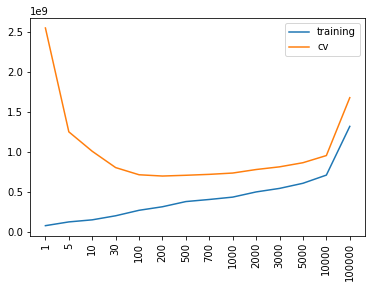

In [224]:
plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Try again with lambda from 30 to 3000

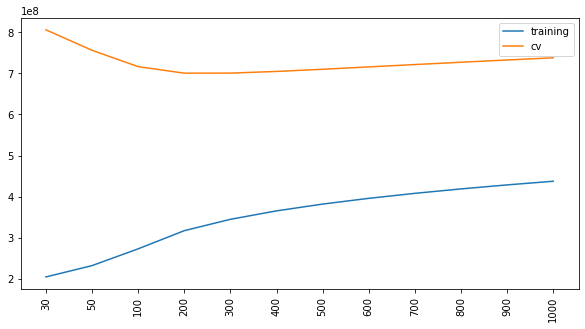

In [225]:
# Plot training error and cv error for a range of lambda values

alphas = [30, 50, 100, 200,300, 400, 500,600, 700,800,900, 1000]
training_errors = []
cv_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)          # create linear reg. model, specifying lambda

    ridge_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = ridge_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = ridge_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

plt.figure(figsize = (10,5))
plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Optimal range: 100 to 400. <br>
Now use entire training set to find optimal value

In [226]:
# Split training / test set

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

alphas = [100 + 120*i for i in range(15)]
cv_errors = []
for alpha in alphas:
    model = Ridge(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

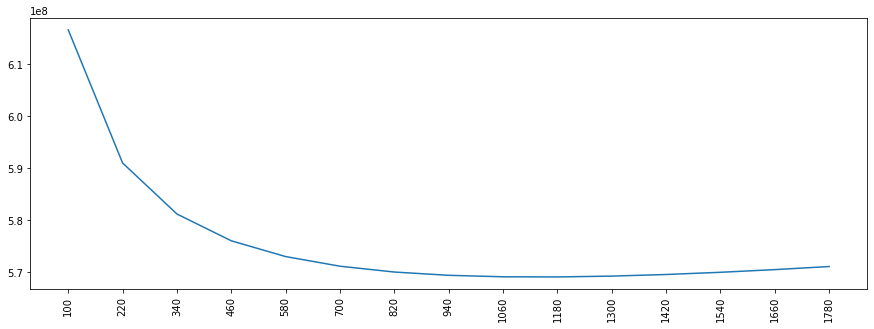

In [227]:
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

Wow. OK, when we look at the entire training set, the optimal lambda seems to be much higher. 

In [228]:
alphas = [700 + 50*i for i in range(20)]
cv_errors = []
for alpha in alphas:
    model = Ridge(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

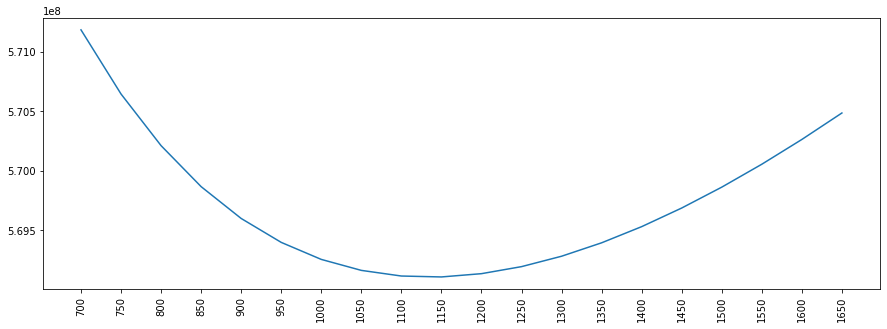

In [229]:
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

In [230]:
alphas = [1000 + 10*i for i in range(30)]
cv_errors = []
for alpha in alphas:
    model = Ridge(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

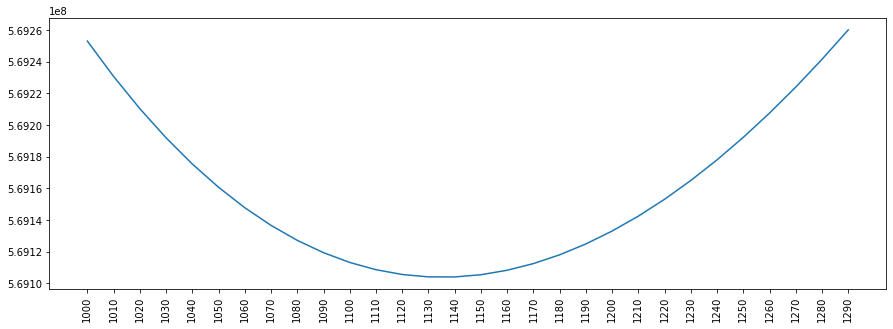

In [231]:
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

In [232]:
# Find min value and corresponding alpha value
min_value = min(cv_errors)
min_index = cv_errors.index(min_value)

alphas[min_index], min_value

(1140, 569104058.5189661)

optimal lambda = 1140

<h5> Create Model, Predict, Evaluate </h5>

In [233]:
# Create model
model = Ridge (alpha = 1140)
model.fit(scaled_X_train, y_train)

# Predict
y_pred = model.predict(scaled_X_test)

# Evaluate
MSE = mean_squared_error(y_pred, y_test)
RMSE = np.sqrt(MSE)
100*RMSE / df['SalePrice'].mean()

12.520555797984972

This is slightly better than degree = 2. But worse than linear Lasso regression (11.37% is the value to beat).

<h5> Lasso Regularisation </h5>

In [234]:
# Select small training set and cv set

X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.8, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')

training set size: 585 ||||| CV set size: 234


In [235]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)

In [236]:
# Plot training error and cv error for a range of lambda values

alphas = [1, 5, 10, 100, 500, 1000, 5000, 8000, 10000]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter= 10000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11926836609.25597, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12855394474.460674, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7648215263.259083, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(


run time = 35 seconds

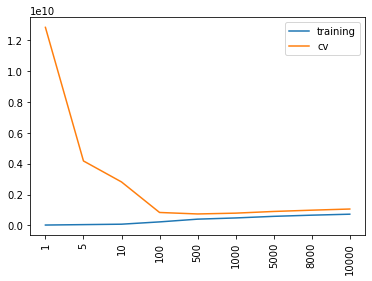

In [237]:
plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Optimal range: between 50 and 1000

In [239]:
# Plot training error and cv error for a range of lambda values

alphas = [50 + 25*i for i in range (20)]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter= 10000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1036072649.8732147, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(


run time = 36 seconds

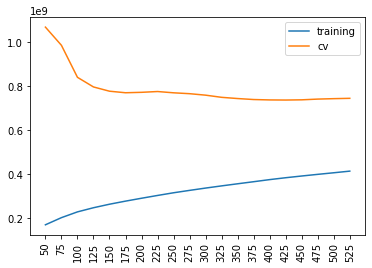

In [240]:
plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Optimal range: between 200 and 400. <br>
Now let's use full training data.

In [245]:
# Split training / test

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_test)}')

training set size: 2632 ||||| CV set size: 293


In [246]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [247]:
# Compute errors for range of lambda values
alphas = [75 + 100*i for i in range(5)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha, max_iter= 5000)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4628261153.505005, tolerance: 1355206692.5276783
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3489249983.9334717, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2959357229.1608887, tolerance: 1415056940.006107
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWa

run time = 2m 13 s

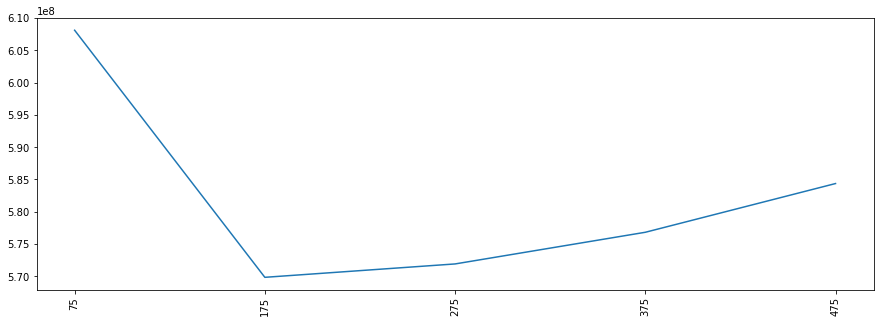

In [248]:
# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

In [ ]:

# Compute errors for range of lambda values
alphas = [100 + 30*i for i in range(10)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    print (f'Computing score for alpha = {alpha}')
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

run time = 1m 4s

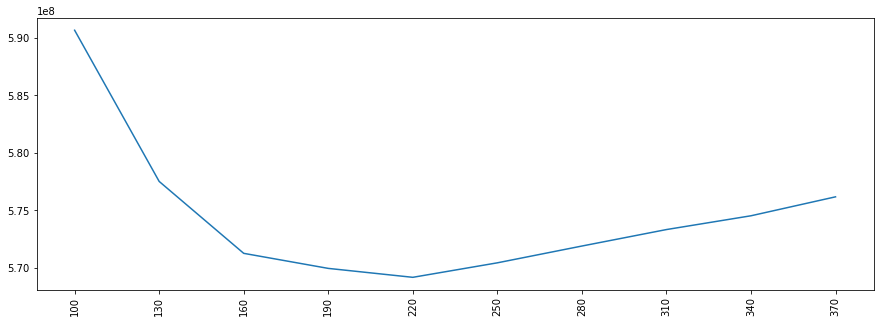

In [252]:
# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

Optimal lambda = 220

<h5> Predict and Evaluate </h5>

In [253]:
# Create model
model = Lasso (alpha = 220, max_iter=10000)
model.fit(scaled_X_train, y_train)

# Predict
y_pred = model.predict(scaled_X_test)

# Evaluate
MSE = mean_squared_error(y_pred, y_test)
RMSE = np.sqrt(MSE)
round (100*RMSE / df['SalePrice'].mean(), 2)

12.72

Mean error = 12.72%

Slightly worse than Ridge regularisation, and still quite a bit worse than linear version. <br> <br>

With the reduced features, we've found that polynomial degree of 3 performed slighlty better than 2. <br>

But the computational times were also noticeably higher.

<h4> Return to polynomial degree = 2 <br> 
Include more features </h4>

In [254]:
corrM = df.corr()
abs(corrM['SalePrice'])>0.25
ser = abs(corrM['SalePrice'])>0.25
# Get just true column labels
ser[ser].index
# Create subset of dataframe including only the selected features
df_subset = df.loc[:, ser]
df_subset.shape

(2925, 55)

We'll try with 55 features, see if the computational time isn't too high.

<h3> Lasso regularisation </h3>

In [255]:
# Create variables 
X = df_subset.drop('SalePrice', axis = 1)
y = df_subset['SalePrice']

print(X.shape)

# Create polynomial features
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)



(2925, 54)


In [259]:
# Select small training set and cv set

X_train, X_dummy, y_train, y_dummy = train_test_split(poly_features, y, test_size=0.8, random_state=101)
X_cv, X_test, y_cv, y_test = train_test_split (X_dummy, y_dummy, test_size = 0.9, random_state = 101)
print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_cv)}')


# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_cv = scaler.transform(X_cv)

training set size: 585 ||||| CV set size: 234


In [154]:
# Plot training error and cv error for a range of lambda values

alphas = [0, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 30, 100, 200, 500, 700, 1000, 2000, 3000, 5000, 10000,100000]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter= 10000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

/var/folders/68/lmdx_4hd4msbstk8y2t5phyh0000gn/T/ipykernel_17266/1220736144.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 628035733.6732285, tolerance: 395987200.9029727
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increas

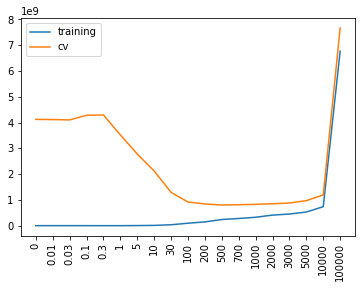

In [155]:
plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Try again from 30 to 15000

In [260]:
# Plot training error and cv error for a range of lambda values

alphas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 5000]
training_errors = []
cv_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter= 10000)          # create linear reg. model, specifying lambda

    lasso_model.fit(scaled_X_train, y_train)    # train lin. reg. model to get theta parameters

    y_pred_train = lasso_model.predict(scaled_X_train)  # use model to predict for training set
    y_pred_cv = lasso_model.predict(scaled_X_cv)        # use model to predict for CV set

    MSE_train = mean_squared_error (y_pred_train, y_train)
    #RMSE_train = np.sqrt(MSE_train)

    MSE_cv = mean_squared_error (y_pred_cv, y_cv)
    #RMSE_cv = np.sqrt(MSE_cv)

    training_errors.append(MSE_train)
    cv_errors.append(MSE_cv)

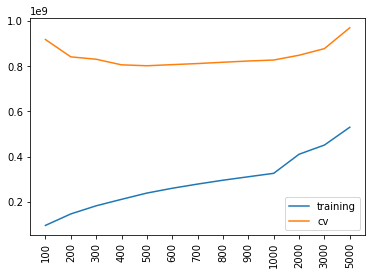

In [261]:
plt.plot(training_errors, label = 'training')
plt.plot(cv_errors, label = 'cv')
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Now use full training set

In [262]:
# Split training / test

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

print (f'training set size: {len(X_train)} ||||| CV set size: {len(X_test)}')

training set size: 2632 ||||| CV set size: 293


In [263]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [264]:
# Compute errors for range of lambda values
alphas = [100 + 50*i for i in range(15)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6075777977.539673, tolerance: 1355206692.5276783
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8701506607.064758, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6418135025.266968, tolerance: 1415056940.006107
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

run time = 47 s

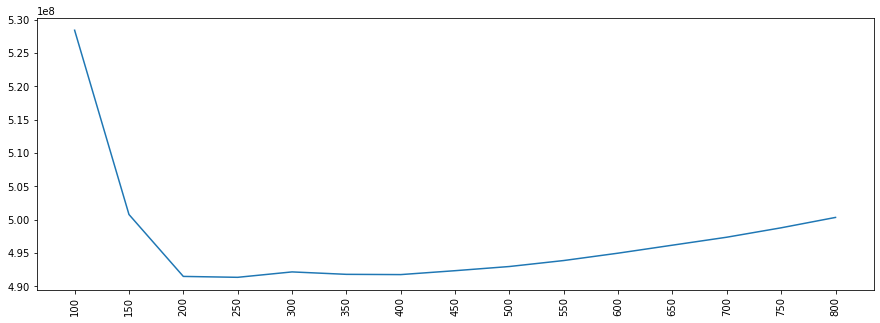

In [265]:
# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

Region around 200 to 400 seems best. Plot one more time.

In [266]:
# Compute errors for range of lambda values
alphas = [150 + 50*i for i in range(8)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1453494078.6608887, tolerance: 1355206692.5276783
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2103797592.8120117, tolerance: 1438198040.0882876
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1740354622.5299072, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


run time = 28s

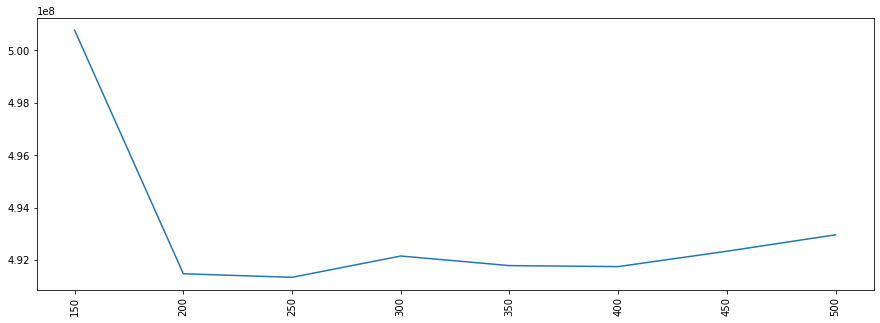

In [267]:
# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

try again for lambda 175 to 350

In [268]:
# Compute errors for range of lambda values
alphas = [175 + 20*i for i in range(8)]
cv_errors = []
for alpha in alphas:
    model = Lasso(alpha = alpha)
    print (f'computing score for alpha = {alpha}')
    scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)
    avg_score = abs(scores).mean()
    cv_errors.append(avg_score)

computing score for alpha = 175


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1792268868.4906006, tolerance: 1438198040.0882876
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1813341931.8457031, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


computing score for alpha = 195
computing score for alpha = 215
computing score for alpha = 235
computing score for alpha = 255
computing score for alpha = 275
computing score for alpha = 295
computing score for alpha = 315


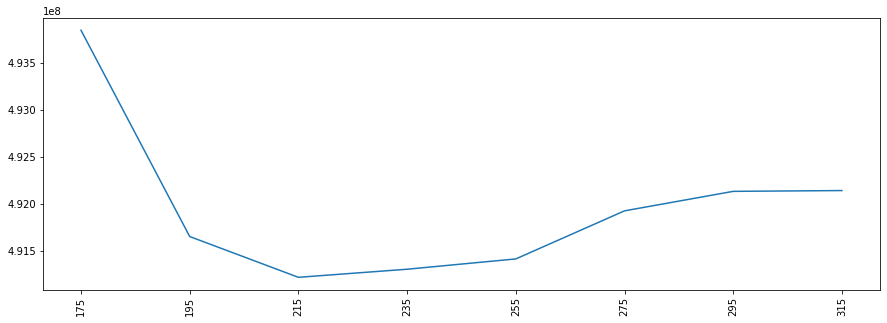

In [269]:
# Plot
plt.figure(figsize = (15,5))
plt.plot(cv_errors)
plt.xticks(ticks = range(len(alphas)), labels = alphas)
plt.xticks(rotation = 90)
plt.show()

Pick lambda = 215

<h5> Create model, predict, evaluate </h5>

In [270]:
# Create model
model = Lasso (alpha = 215)
model.fit(scaled_X_train, y_train)

# Predict
y_pred = model.predict(scaled_X_test)

# Evaluate
MSE = mean_squared_error(y_pred, y_test)
RMSE = np.sqrt(MSE)
round (100*RMSE / df['SalePrice'].mean(), 2)

12.17

OK, error slightly lower now that we've included more features. <br>
But still, the linear regression with ridge regularisation was the best.